# **FPL: A DS Approach for Team Selection**

## 1. Enviroment Configuration

>Import Libraries

In [1]:
# Import Libraries
import api as client
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pprint


> Seaborn Config

In [2]:
# Seaborn configuration
%matplotlib inline
# sns.set_palette(sns.color_palette('magma',n_colors=20))
# sns.barplot(data=df,x='team',y='total_points',estimator=sum)

## 2. Load Client


>Custom python [wrapper](./api.py) for FPL REST API

In [3]:
client = client.FPLClient()

## 3. Auxiliary Dataframes and Functions

>Maps Column _mValue_ from DataFrame _mapper_ by _mIndex_ to Dataframe _df_ by _dfIndex_

In [4]:
# Maps two columns on two DataFrames

def getMappedDF(df,dfIndex,mapper,mIndex,mValue):
    mapperFilter = mapper[[mIndex,mValue]].copy()
    df = pd.merge(df, mapperFilter,
                  how='left',
                  left_on=dfIndex,
                  right_on=mIndex)
    if dfIndex != mIndex:
        try:
            df.drop(mIndex,axis=1,inplace=True)
        except:
            pass
    return df

In [5]:
# Teams DataFrame general data

teams = client.general.teams_details()
teams.head()   
    

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1200,1270,1160,1230,1160,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1090,1100,1110,1110,1070,1090,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1050,1070,1070,1110,1040,1070,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,...,None,False,0,1100,1150,1100,1150,1140,1170,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,...,None,False,0,1140,1140,1170,1160,1150,1170,131


In [6]:
# Players DataFrame general data

players = client.general.players_details()
players.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,penalties_order,penalties_text,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type
0,100.0,100.0,58822,0,0,-3,3,0,2,0.7,...,NaN,,539,157,354,121,367,134,401,149
1,NaN,NaN,84450,0,0,1,-1,1,3,5.3,...,NaN,,170,99,36,13,33,16,81,26
2,100.0,100.0,153256,0,0,-3,3,1,3,0.7,...,NaN,,546,282,357,166,319,140,218,68
3,NaN,NaN,156074,0,0,-3,3,0,2,1.0,...,NaN,,547,163,312,103,370,137,419,156
4,100.0,100.0,167199,0,0,-2,2,0,3,4.7,...,NaN,,262,160,57,24,62,29,244,79


In [7]:
# Players' position mapping

players_type = pd.DataFrame(
    {
        'element_type':list(range(1,5)),
        'type_string': ['Goalkeeper','Defense','Midfield','Forward']
    }
)
players = getMappedDF(players,'element_type',players_type,'element_type','type_string')
players.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,penalties_text,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,type_string
0,100.0,100.0,58822,0,0,-3,3,0,2,0.7,...,,539,157,354,121,367,134,401,149,Defense
1,NaN,NaN,84450,0,0,1,-1,1,3,5.3,...,,170,99,36,13,33,16,81,26,Midfield
2,100.0,100.0,153256,0,0,-3,3,1,3,0.7,...,,546,282,357,166,319,140,218,68,Midfield
3,NaN,NaN,156074,0,0,-3,3,0,2,1.0,...,,547,163,312,103,370,137,419,156,Defense
4,100.0,100.0,167199,0,0,-2,2,0,3,4.7,...,,262,160,57,24,62,29,244,79,Midfield


In [8]:
fixtures = pd.DataFrame(client.fixtures.all())
fixtures.head()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2292871,NaN,False,False,61,None,0,False,None,8,NaN,1,NaN,[],2,4,74971
1,2292921,NaN,False,False,111,None,0,False,None,13,NaN,1,NaN,[],5,4,75021
2,2292870,NaN,False,False,62,None,0,False,None,5,NaN,3,NaN,[],3,2,74972
3,2292882,NaN,False,False,73,None,0,False,None,7,NaN,5,NaN,[],2,3,74983
4,2292883,NaN,False,False,74,None,0,False,None,12,NaN,6,NaN,[],4,4,74984


## 3. Feature Engineering

#### 3.1. Main DataFrame extraction

In [9]:
# Gets DF of all player ratings for every match

def get_all_players():
    df_all = pd.DataFrame()
    for player_id in players['id'].tolist():
        a = client.details.all(player_id)
        df_p = pd.DataFrame(a['history'])
        if df_all.__len__() == 0:
            df_all = df_p
        else:
            df_all = pd.concat([df_all, df_p])
    return df_all

df_ = get_all_players()
df = df_.copy()

In [10]:
df = df_.copy()

In [11]:
df[df.columns[:20]].head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves
0,1,1,7,0,False,2022-08-05T19:00:00Z,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,1,11,10,0,True,2022-08-13T14:00:00Z,4,2,2,0,0,0,0,0,0,0,0,0,0,0
2,1,21,3,0,False,2022-08-20T16:30:00Z,0,3,3,0,0,0,0,0,0,0,0,0,0,0
3,1,31,9,0,True,2022-08-27T16:30:00Z,2,1,4,0,0,0,0,0,0,0,0,0,0,0
4,1,41,2,0,True,2022-08-31T18:30:00Z,2,1,5,0,0,0,0,0,0,0,0,0,0,0


#### 3.2. Mapping

In [13]:
df = getMappedDF(df,'fixture',fixtures,'id','event')

In [14]:
table_df = pd.DataFrame()
_list = df.event.unique()
_list.sort()
for _ in _list:
    table_wdf = client.fixtures.get_table(_)
    table_wdf['event'] = _
    if table_df.__len__() == 0:
        table_df = table_wdf
    else:
        table_df = pd.concat([table_df, table_wdf])

table_df.reset_index(inplace=True)
table_df['index'] += 1
table_df.columns = ['position_oppo', 'opponent_team', 'points', 'favor', 'against', 'diff', 'event']
df = pd.merge(df, table_df[['position_oppo', 'opponent_team', 'event']], how='left',
              left_on=['opponent_team', 'event'],
              right_on=['opponent_team', 'event'])

fix_merge = all_fixtures[['team_h', 'team_a', 'event']].copy()
dfOppoVisit = df.loc[df['was_home']].copy()
fix_merge.columns = ['team', 'opponent_team', 'event']
dfOppoVisit = pd.merge(dfOppoVisit, fix_merge, how='left',
                       left_on=['opponent_team', 'event'],
                       right_on=['opponent_team', 'event'])

dfOppoHome = df.loc[~df['was_home']].copy()
fix_merge.columns = ['opponent_team', 'team', 'event']
dfOppoHome = pd.merge(dfOppoHome, fix_merge, how='left',
                      left_on=['opponent_team', 'event'],
                      right_on=['opponent_team', 'event'])

df = pd.concat([dfOppoVisit, dfOppoHome], ignore_index=True)
df.sort_values(by = ['element', 'fixture']).reset_index(drop=True,inplace=True)

NameError: name 'all_fixtures' is not defined

In [27]:

# dfMapped = getMappedDF(df,'team',teams,'id','short_name')
# dfMapped = getMappedDF(dfMapped,'element',players,'id','web_name')
# dfMapped = getMappedDF(dfMapped,'element',players,'id','element_type')

KeyError: 'team'

In [13]:
df.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,event,position_oppo,team
0,1,11,10,0,True,2022-08-13T14:00:00Z,4,2,2,0,...,0.0,0.0,44,-5169,24193,1361,6530,2.0,11.0,1
1,1,31,9,0,True,2022-08-27T16:30:00Z,2,1,4,0,...,0.0,0.0,43,-2988,18825,577,3565,4.0,7.0,1
2,1,41,2,0,True,2022-08-31T18:30:00Z,2,1,5,0,...,0.0,0.0,43,-1611,17790,405,2016,5.0,15.0,1
3,1,81,18,0,True,2022-10-01T11:30:00Z,3,1,9,0,...,0.0,0.0,42,-1572,15362,64,1636,9.0,3.0,1
4,1,91,12,0,True,2022-10-09T15:30:00Z,3,2,10,0,...,0.0,0.0,42,-828,14630,148,976,10.0,9.0,1


### String Mapping

### Highest points by Team

<AxesSubplot: xlabel='short_name', ylabel='total_points'>

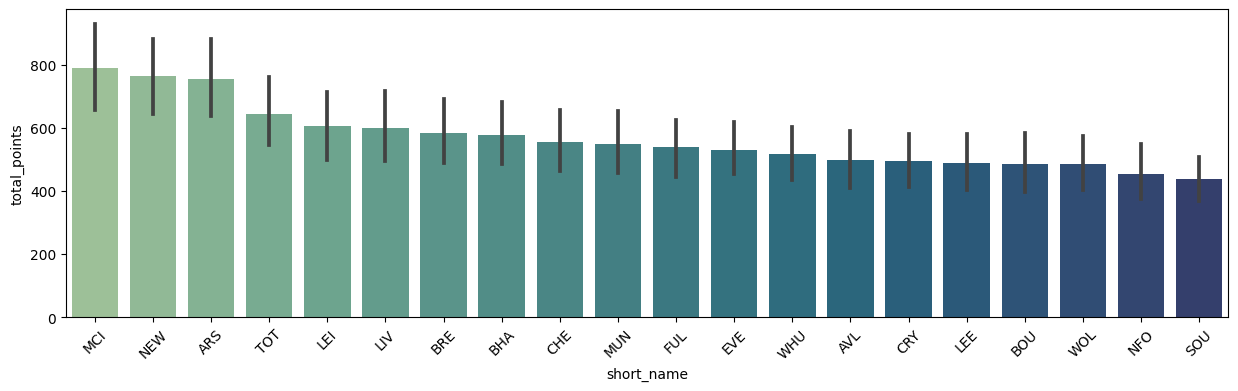

In [15]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.barplot(data =dfMapped,
            x='short_name',
            y='total_points',
            order = dfMapped.groupby('short_name').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index,
            estimator=sum,
            palette='crest')

In [16]:
dfMappedSum = dfMapped.groupby('element').sum(numeric_only=True)['total_points']
dfMappedSum2 = dfMapped.groupby('element')['web_name'].apply(pd.Series.mode)
dfMappedSum= dfMappedSum.to_frame().join(dfMappedSum2).sort_values('total_points',ascending=False)


dfMappedSum

,,total_points,web_name
element,,,
318,0,122,Haaland
427,0,91,Kane
357,0,89,Trippier
301,0,88,De Bruyne
369,0,87,Almirón
...,...,...,...
250,0,0,Bertrand
248,0,0,Schmeichel
247,0,0,Gyabi


<AxesSubplot: xlabel='web_name', ylabel='total_points'>

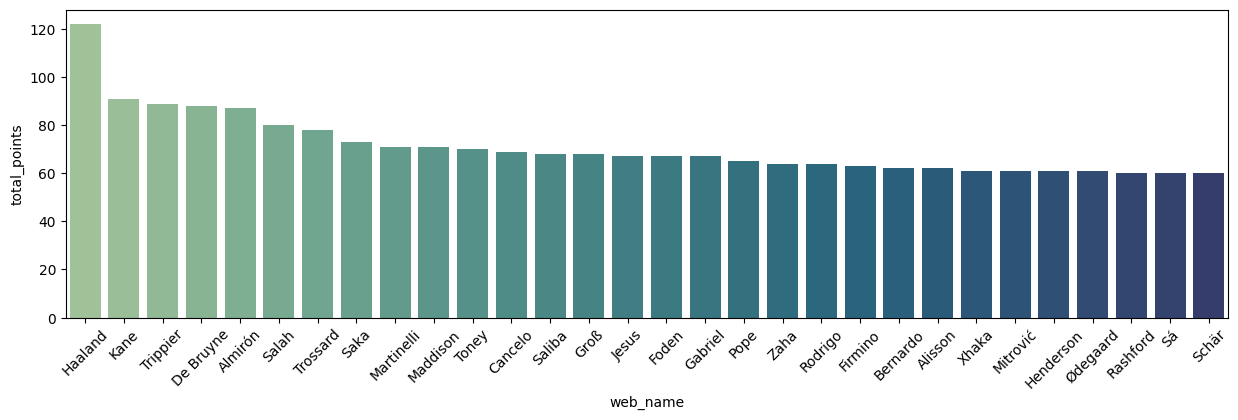

In [17]:
top = 30
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.barplot(
            x=dfMappedSum['web_name'].head(top),
            y=dfMappedSum['total_points'].head(top),
            # estimator=sum,
            palette='crest')

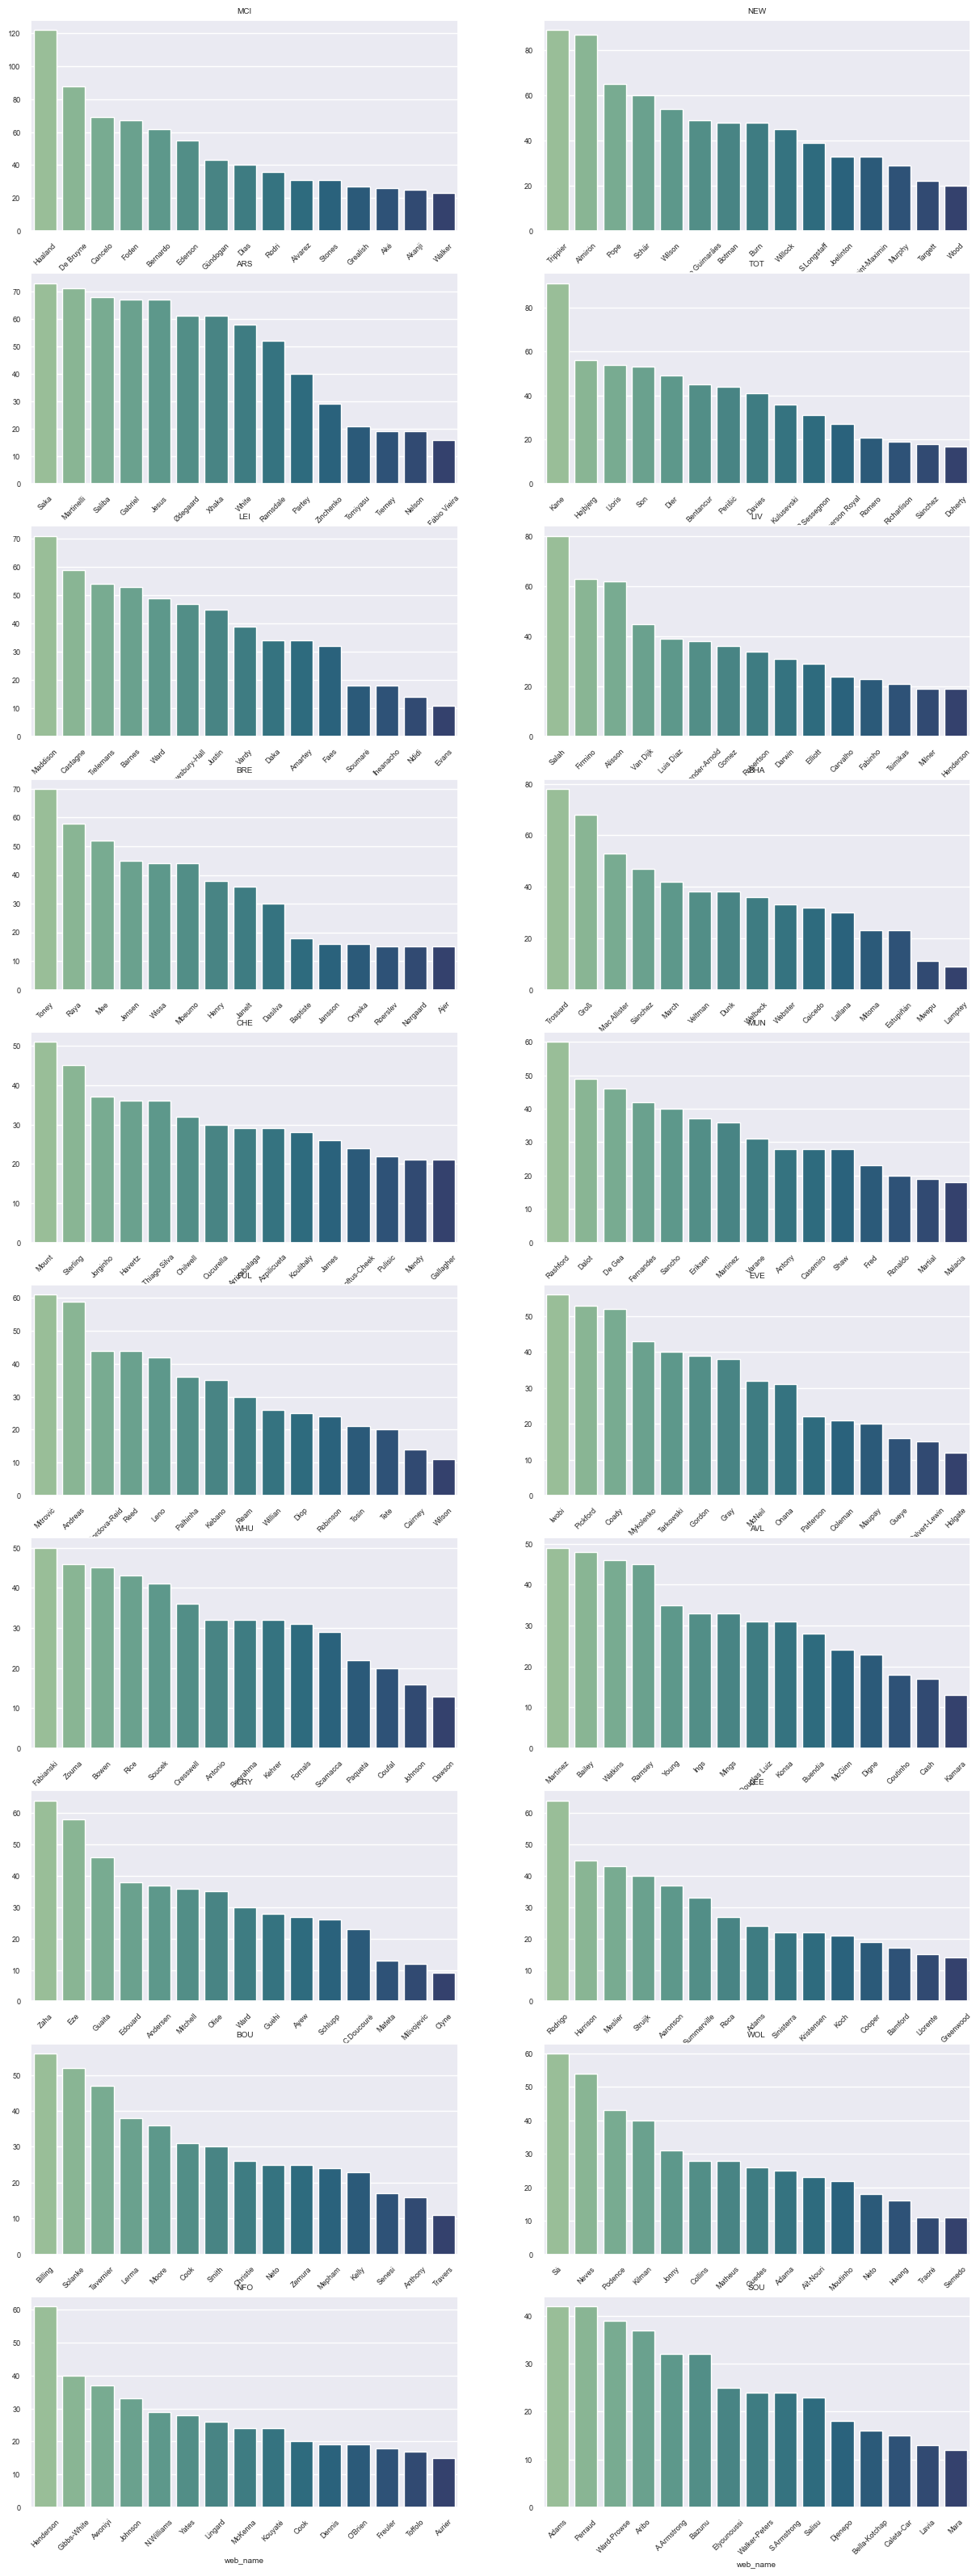

In [18]:
sns.set_theme(font_scale = 0.6)
fig, ax = plt.subplots(10,2, figsize=(15,40))
ax = ax.flatten()
top = 15
_topTeams = list(dfMapped.groupby('short_name').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index)
for _ in range(0,len(_topTeams)):
    _team = _topTeams[_]
    dfMappedSumTeam = dfMapped.loc[dfMapped['short_name']==_team].groupby('web_name').sum(numeric_only=True)['total_points'].sort_values(ascending=False)
    ax[_].tick_params(axis='x', rotation=45)
    ax[_].set_title(_team)
    
    _plot = sns.barplot(
                x=dfMappedSumTeam.head(top).index,
                y=dfMappedSumTeam.head(top).values,
                # estimator=sum,
                palette='crest',
                ax=ax[_])

sns.set_theme(font_scale = 1)

<AxesSubplot: xlabel='element_type', ylabel='total_points'>

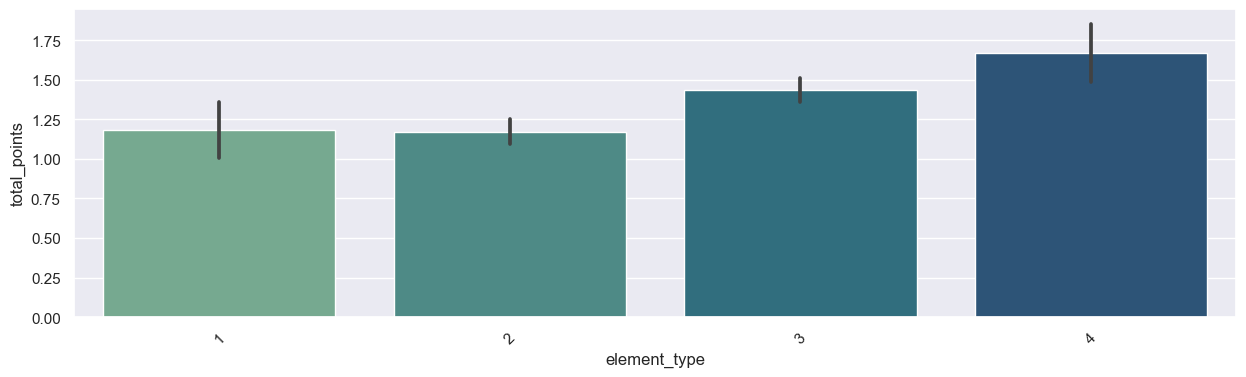

In [22]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.barplot(
            x=dfMapped['element_type'],
            y=dfMapped['total_points'],
            # estimator=mean,
            palette='crest')

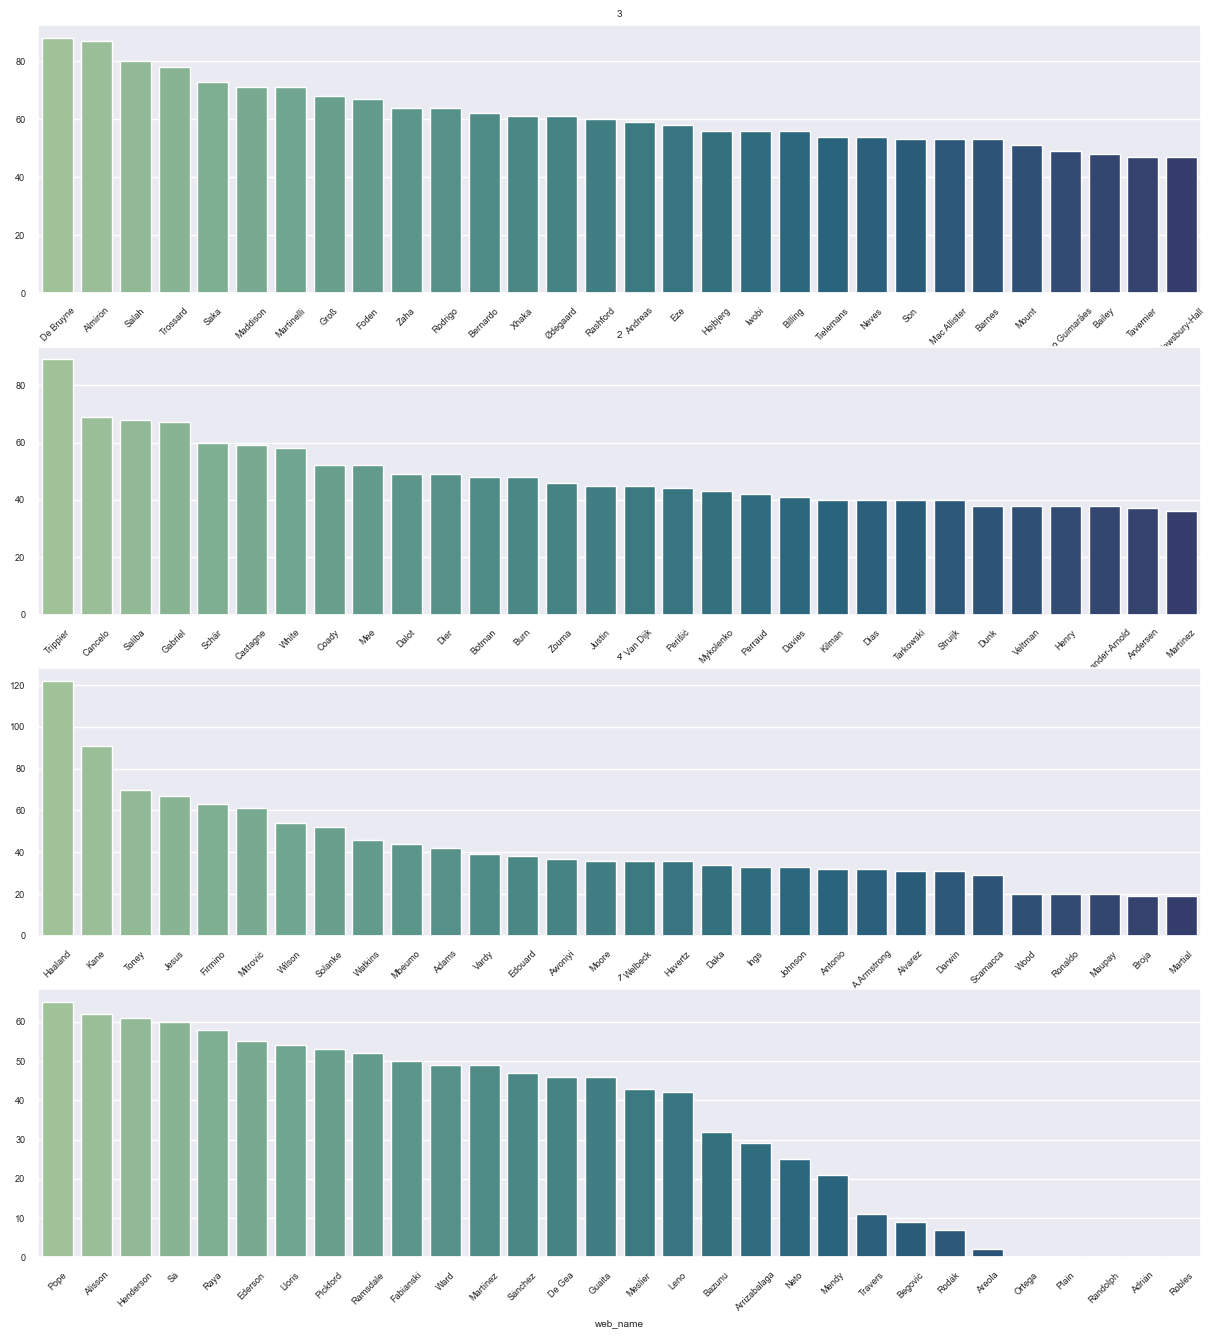

In [24]:
sns.set_theme(font_scale = 0.6)
fig, ax = plt.subplots(4,1, figsize=(15,16))
ax = ax.flatten()
top = 30
_topPositions = list(dfMapped.groupby('element_type').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index)
for _ in range(0,len(_topPositions)):
    _position = _topPositions[_]
    dfMappedSumTeam = dfMapped.loc[dfMapped['element_type']==_position].groupby('web_name').sum(numeric_only=True)['total_points'].sort_values(ascending=False)
    ax[_].tick_params(axis='x', rotation=45)
    ax[_].set_title(_position)
    
    _plot = sns.barplot(
                x=dfMappedSumTeam.head(top).index,
                y=dfMappedSumTeam.head(top).values,
                # estimator=sum,
                palette='crest',
                ax=ax[_])

sns.set_theme(font_scale = 1)